In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

df_1 = pd.read_csv('ani_s01.csv')
df_2 = pd.read_csv('ani_s02.csv')
df_3 = pd.read_csv('ani_s03.csv')

In [5]:
display(df_1["formula"].unique())
display(df_2["formula"].unique())
display(df_3["formula"].unique())

array(['H4C', 'H3N', 'H2O'], dtype=object)

array(['H6C2', 'H5CN', 'N2', 'H3NO', 'HNO', 'H4CO', 'H4C2', 'H2CO', 'O2',
       'H2O2', 'H2C2', 'H4N2', 'H2N2'], dtype=object)

array(['H8C3', 'H7C2N', 'H3CNO', 'H2CO2', 'H4CN2', 'H4C3', 'H6C3',
       'H5C2N', 'H4C2O', 'HNO2', 'H2O3', 'H6C2O', 'CO2', 'H3C2N'],
      dtype=object)

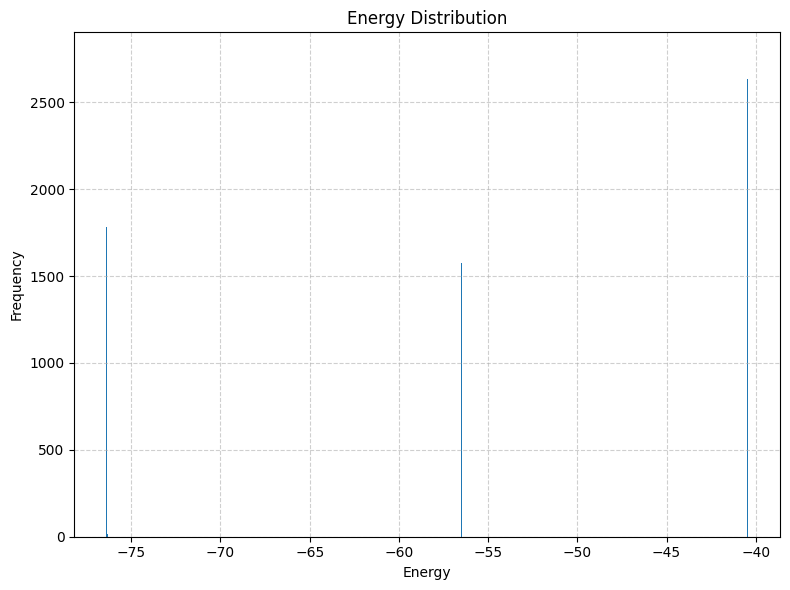

In [ ]:
def plot_unique_energy_histogram(df, bins=1000):
    unique_energies = df.drop_duplicates(subset=["molecule_id"])["energy"]

    plt.figure(figsize=(8, 6))
    plt.hist(unique_energies, bins=bins)
    plt.title("Energy Distribution")
    plt.xlabel("Energy")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_unique_energy_histogram(df_1)

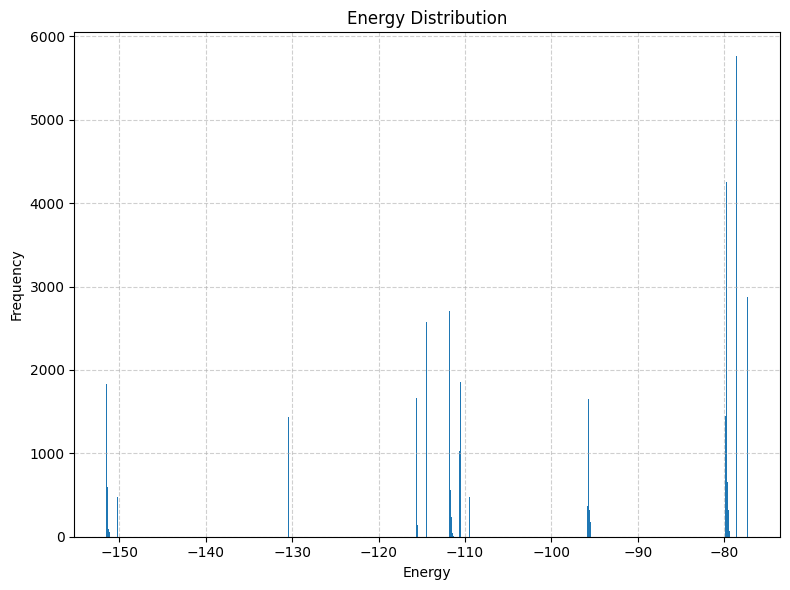

In [17]:
plot_unique_energy_histogram(df_2)

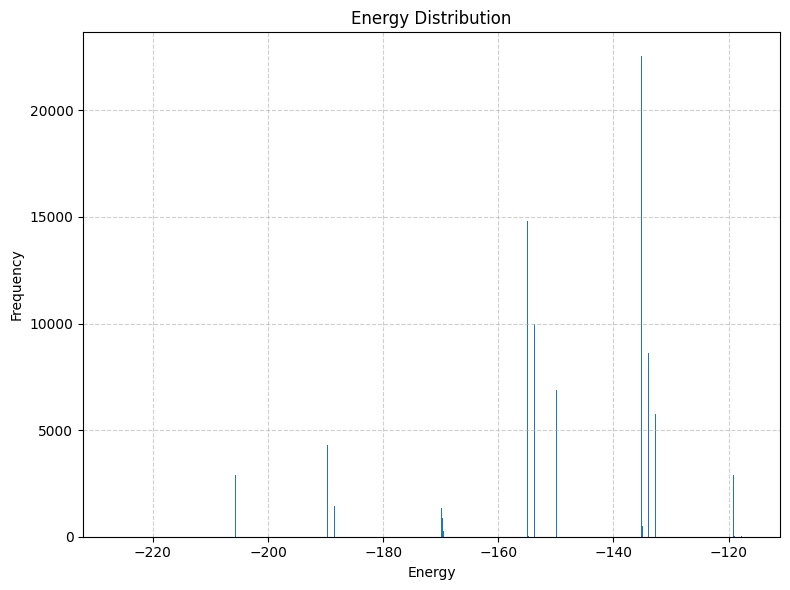

In [18]:
plot_unique_energy_histogram(df_3)

In [ ]:
def sample_conformers_per_formula(csv_file, output_file, sample_size=1000, seed=42):
    df = pd.read_csv(csv_file)

    df_unique = df.drop_duplicates(subset=["molecule_id"])

    grouped = df_unique.groupby("formula")
    
    selected_ids = []

    rng = np.random.default_rng(seed)

    for formula, group in grouped:
        ids = group["molecule_id"].unique()
        sample_n = min(len(ids), sample_size)
        sampled_ids = rng.choice(ids, size=sample_n, replace=False)
        selected_ids.extend(sampled_ids)

    df_filtered = df[df["molecule_id"].isin(selected_ids)]

    df_filtered.to_csv(output_file, index=False)
    print(f"Saved {len(selected_ids)} unique conformers across all formulas to {output_file}")

sample_conformers_per_formula("ani_s01.csv", "ani_s01_sampled_100.csv", sample_size=100)

Saved 300 unique conformers across all formulas to ani_s01_sampled_100.csv


In [24]:
sample_conformers_per_formula("ani_s02.csv", "ani_s02_sampled_100.csv", sample_size=100)

Saved 1300 unique conformers across all formulas to ani_s02_sampled_100.csv


In [25]:
sample_conformers_per_formula("ani_s03.csv", "ani_s03_sampled_100.csv", sample_size=100)

Saved 1400 unique conformers across all formulas to ani_s03_sampled_100.csv


In [26]:
sample_conformers_per_formula("ani_s04.csv", "ani_s04_sampled_100.csv", sample_size=100)

Saved 2900 unique conformers across all formulas to ani_s04_sampled_100.csv


In [ ]:
sample_conformers_per_formula("ani_s05.csv", "ani_s05_sampled_100.csv", sample_size=100)

In [7]:
df_1 = pd.read_csv('ani_s01_sampled_100.csv')
df_2 = pd.read_csv('ani_s02_sampled_100.csv')
df_3 = pd.read_csv('ani_s03_sampled_100.csv')
df_4 = pd.read_csv('ani_s04_sampled_100.csv')
df_5 = pd.read_csv('ani_s05_sampled_100.csv')

In [12]:
display(df_1["molecule_id"].nunique())
display(df_2["molecule_id"].nunique())
display(df_3["molecule_id"].nunique())
display(df_4["molecule_id"].nunique())
display(df_5["molecule_id"].nunique())

300

1300

1400

2900

4300

In [15]:
def add_prefix(df, prefix):
    df = df.copy()
    df['molecule_id'] = prefix + df['molecule_id'].astype(str)
    return df

df1 = add_prefix(df_1, 'f1_')
df2 = add_prefix(df_2, 'f2_')
df3 = add_prefix(df_3, 'f3_')
df4 = add_prefix(df_4, 'f4_')
df5 = add_prefix(df_5, 'f5_')

combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [16]:
combined_df

,molecule_id,z1,z2,distance,energy,formula
0,f1_mol_00034,6,1,1.015393,-40.459883,H4C
1,f1_mol_00034,6,1,1.151930,-40.459883,H4C
2,f1_mol_00034,6,1,1.198520,-40.459883,H4C
3,f1_mol_00034,6,1,1.015915,-40.459883,H4C
4,f1_mol_00034,1,1,1.619255,-40.459883,H4C
...,...,...,...,...,...,...
384495,f5_mol_1811764,1,1,2.819556,-232.310975,H8C4O
384496,f5_mol_1811764,1,1,3.305163,-232.310975,H8C4O
384497,f5_mol_1811764,1,1,3.266915,-232.310975,H8C4O
384498,f5_mol_1811764,1,1,2.642774,-232.310975,H8C4O


In [17]:
combined_df["molecule_id"].nunique()

10200

In [ ]:
combined_df.to_csv("ani_s01-5_sampled_100.csv", index=False)